# Animation example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

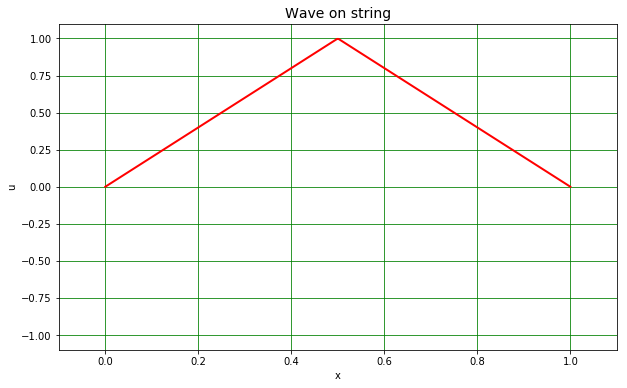

In [11]:
def uf(k, l, c, x, t):
    if not hasattr(uf, "nA"):
        uf.nA = 2000
        uf.a = np.array(uf.nA)
        uf.a = np.linspace(1, 2*uf.nA - 1, uf.nA)
        uf.o = (-1)**np.linspace(0, uf.nA - 1, uf.nA)
    #
    n = len(x)
    u = np.zeros(n)
    for i in range(0, n):
        u[i] = 8*k/np.pi**2*np.sum(uf.o*np.sin(uf.a*np.pi/l*x[i])/uf.a**2*np.cos(uf.a*np.pi*c/l*t))
    return u
#
k = 1
l = 1
c = 1
#
nX = 300
xBot = 0.0
xTop = 1.0
xArr = np.linspace(0, l, nX)
#
nTimes = 600
tBot = 0.0
tTop = 6.0
tArr = np.linspace(tBot, tTop, nTimes)
#
Writer = animation.writers['ffmpeg']
writer = Writer(fps = 50, metadata = dict(artist = 'TG'), bitrate = 1800)
#
fig = plt.figure(figsize=(10, 6))
#
def animate(i):
    plt.cla()
    plt.xlim(-0.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('x')
    plt.ylabel('u')
    plt.grid(color = 'g')
    plt.title('Wave on string', fontsize = 14)
    plt.plot(xArr, uf(k, l, c, xArr, tArr[i]), lw = 2, color = 'r')
#
ani = animation.FuncAnimation(fig, animate, frames = nTimes, repeat = True)
#
ani.save('TriangleWave.mp4', writer = writer)
plt.show()